<a href="https://colab.research.google.com/github/ayush-shinde/netflix-recc/blob/main/Netflix_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NETFLIX MOVIE & TV SHOWS RECOMMENDATION SYSTEM**

In [137]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [138]:
netflix= pd.read_csv('netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [139]:
netflix.shape

(8807, 12)

In [140]:
df= netflix.copy()

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [142]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Some of the date values are null, which will be encountered later.

##**Exploratory Data Analysis of the dataset**

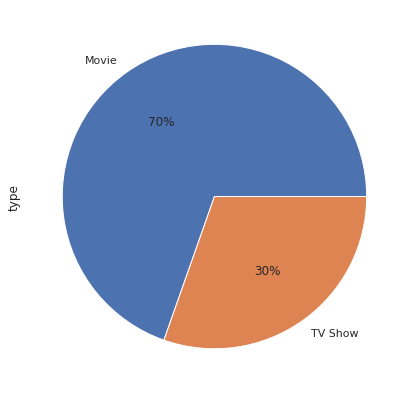

In [143]:
plt.figure(figsize=(10,7))
df['type'].value_counts().plot(kind='pie',autopct='%.0f%%')

So, the majority of content on netflix is movies.

In [144]:
#total number of movies directed by various directors
df['director'].value_counts()

Rajiv Chilaka                      19
Raúl Campos, Jan Suter             18
Suhas Kadav                        16
Marcus Raboy                       16
Jay Karas                          14
                                   ..
Helena Coan                         1
Raj Kanwar                          1
Travon Free, Martin Desmond Roe     1
Tarek Al Eryan                      1
Doug Hamilton                       1
Name: director, Length: 4528, dtype: int64

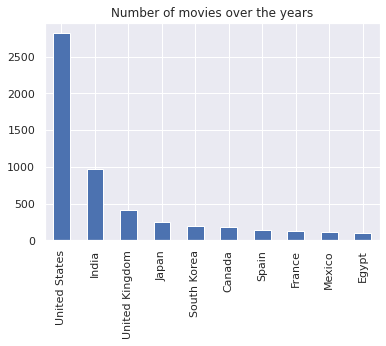

In [145]:
country = df['country'].value_counts()[:10]
country.plot(kind='bar',title='Number of movies over the years')

United States is the top content creator followed by India, with Egypt and Mexico being the least among the list of top 10 content creating countries.

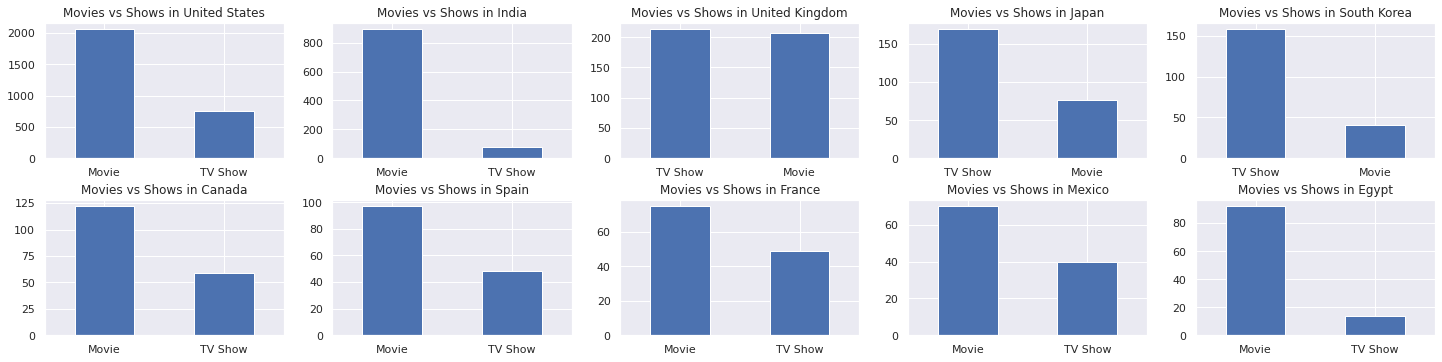

In [146]:
plt.figure(figsize=(20,5))

for i in range(len(country.index)):
    plt.subplot(2,5,i+1)
    moviesvsshows = df[df['country'] == country.index[i]]
    moviesvsshows = moviesvsshows['type'].value_counts()
    moviesvsshows.plot(kind='bar')
    plt.title("Movies vs Shows in {}".format(country.index[i]))
    plt.xticks(rotation = 360)
    
plt.tight_layout(pad=0.5)

Diving deeper into the data of number of movies and TV shows created in various countries, we can see that countries like India and Egypt contribute more movies than TV shows. Although, United States of America and India are the biggest content contributor, we observe United Kingdom, Japan, South Korea offer more TV Shows compared to their contribution in Movies.



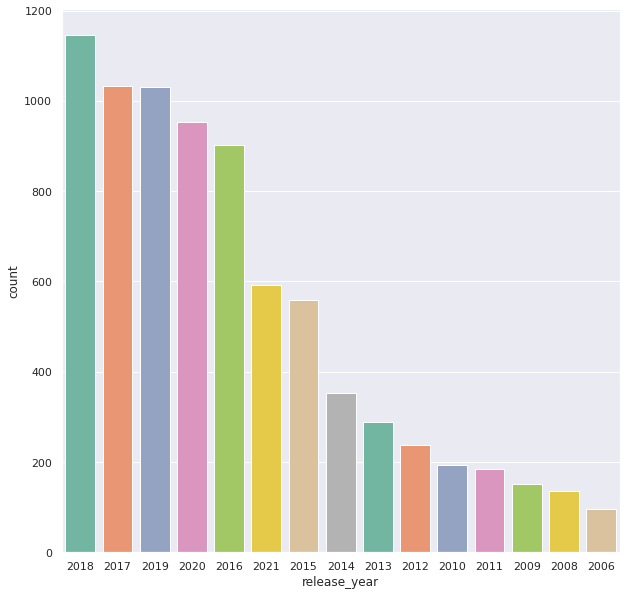

In [147]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
ax = sns.countplot(x='release_year', data=df_netflix, palette="Set2", order=df['release_year'].value_counts().index[:15])

Less number of movies & TV shows have been added till 2014(starting from 2006). The number rose after the year 2015.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

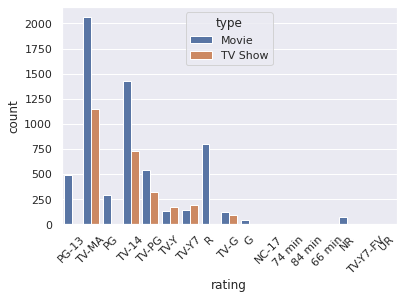

In [148]:
sns.countplot(x='rating',data=df, hue='type')
plt.xticks(rotation = 45)

It can be inferred that Netflix mostly targets older/mature audience as there are several contents whether movies or tv shows rated as "TV Mature Audience (TV-MA)". This is followed by content for children less than age of 14, which is indicated by "TV-14"

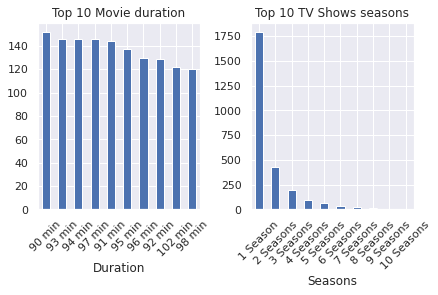

In [149]:
plt.subplot(1,2,1)
movies_duration = df[df['type'] == "Movie"]
movies_duration = movies_duration['duration'].value_counts()[:10]
movies_duration.plot(kind='bar',title='Number of movies over the years')
plt.xlabel("Duration")
plt.title("Top 10 Movie duration")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
show_duration = df[df['type'] == "TV Show"]
show_duration = show_duration['duration'].value_counts()[:10]
show_duration.plot(kind='bar',title='Number of movies over the years')
plt.xlabel("Seasons")
plt.title("Top 10 TV Shows seasons")
plt.xticks(rotation = 45)

plt.tight_layout(pad=0.3)

For above mentioned data of 'Top 10 movies duration', the length of each movie is mostly above 1 and a half hour, whereas a large number of TV Shows are to be limited series of 1 season compared to others.

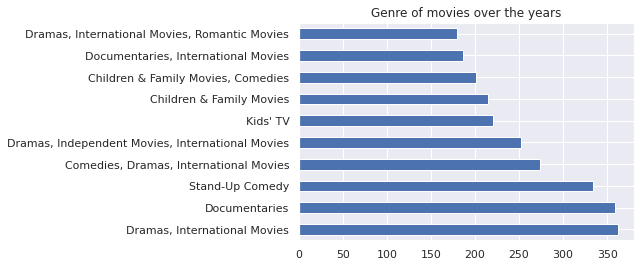

In [150]:
genre = df["listed_in"].value_counts()[:10]
genre.plot(kind='barh',title='Genre of movies over the years')

Netflix offers a large number of Dramas and International Movies, Documentaries and Standup comedies as compared to other genres. 

#### **Summary of the Analysis:**
1. In many countries OTT platforms don’t come under government censorship, thus Netflix one of such OTT platforms offers majority content catering to their "The Mature Audience".
2. Netflix offered few movies between the years 2008 - 2015, before adding a vast range thereafter.
3. Several TV Shows had been added between 2017 - 2019, probably to cater to the increasing demand and fascination revolving around TV Shows.
4. It can be inferred that Netflix mostly targets older/mature audience as there are several contents whether movies or tv shows rated as "TV Mature Audience (TV-MA)". This is followed by content for children less than age of 14, which is indicated by "TV-14"
5. Among the 'Top 10 movies duration', the length of each movie is mostly above 1 and a half hour, whereas a large number of TV Shows are to be limited series of 1 season compared to others.
6. United States is the top content creator followed by India, with Egypt and Mexico being the least among the list of top 10 content creating countries.
7. Countries like India and Egypt contribute more movies than TV shows. Although The United States of America and India are the biggest content contributor, we observe United Kingdom, Japan, South Korea offer more TV Shows compared to their contribution in Movies.
8. Majority of content on Netflix is Dramas and International Movies, Documentaries and Standup comedies.

In [151]:
#creating a separate dataframe for descriptions of the content
df0= df[['title','director','cast','listed_in','description']]
df0.head()

,title,director,cast,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,NaN,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [152]:
df0.isnull().sum()

title             0
director       2634
cast            825
listed_in         0
description       0
dtype: int64

Since the 'director' and 'cast' columns have considerable number of null values, we can replace them with a common string like 'Unknown' as done below.

In [153]:
df0['director'].replace(np.nan,'unknown',inplace=True)
df0['cast'].replace(np.nan,'unknown',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [154]:
#to replace the commas in cast column with a space
df0['cast'] = df0['cast'].str.replace(', ',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [155]:
#to replace the commas in genre (listed_in) column with a space
df0['listed_in'] = df0['listed_in'].str.replace(', ',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [156]:
#to create a separate dataframe without description column in it
df0_wo_des = df0.drop(['description'],axis=1)

In [157]:
df0['combined'] = df0['title'] + ' ' + df0['director'] + ' ' + df0['cast'] + ' ' + df0['listed_in'] + ' ' + df0['description']
df0_wo_des['combined'] = df0_wo_des['title'] + ' ' + df0_wo_des['director'] + ' ' + df0_wo_des['cast'] + ' ' + df0_wo_des['listed_in']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
df0.drop(['cast','director','listed_in','description'],axis=1,inplace=True, errors='ignore')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [159]:
df0.head()

,title,combined
0,Dick Johnson Is Dead,Dick Johnson Is Dead Kirsten Johnson unknown D...
1,Blood & Water,Blood & Water unknown Ama Qamata Khosi Ngema G...
2,Ganglands,Ganglands Julien Leclercq Sami Bouajila Tracy ...
3,Jailbirds New Orleans,Jailbirds New Orleans unknown unknown Docuseri...
4,Kota Factory,Kota Factory unknown Mayur More Jitendra Kumar...


Hence, the above dataframe  now consist of all the attributes of a movie in one column and the title in another column.
This will be useful in recommendation system process.

##**Recommendation System**

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [161]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df0['combined'].str.lower())

tfidf_matrix.shape

(8807, 52938)

In [162]:
from sklearn.metrics.pairwise import linear_kernel

#cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Cosine similarity is a metric used to measure how similar the documents are irrespective of their size.

In [163]:
print(df0.index)

RangeIndex(start=0, stop=8807, step=1)


In [164]:
indices = pd.Series(df0.index, index=df0['title']).drop_duplicates()

In [165]:
def get_recommendations(title, cosine_sim=cosine_sim):
    try:
        idx = indices[title]
    except:
        return None
        
    #Get similarity score with all movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    #Top 10 movies. The 0th will be the movie itself
    sim_scores = sim_scores[1:11]
    
    # Get the movie indices
    match = [i[0] for i in sim_scores]
    score = [i[1] for i in sim_scores]
    dictionary = dict(zip(match, score))
    
    return dictionary

In [166]:
def recommend(title):
    result = get_recommendations(title)
  
    if result is None:
        print(f'{title} not found in database')
    else:
        print(f'Movie related to {title} are: ')
        for i in result:
            print(f"{df0['title'].iloc[i]} with score {result[i]*100:.2f} %")

Enter recommend('movie name') and get the list of related movies/tv show name to wacth along with the recommendation index.

In [167]:
recommend('Avengers: Infinity War')

Movie related to Avengers: Infinity War are: 
Thor: Ragnarok with score 16.99 %
Black Panther with score 11.27 %
Her with score 10.78 %
Mark Gatiss: A Study in Sherlock with score 10.73 %
War Horse with score 10.42 %
The Little Prince with score 9.24 %
Chef with score 9.02 %
Chris Brown: Welcome to My Life with score 8.37 %
Crimson Peak with score 8.27 %
Legion with score 8.16 %


In [168]:
recommend('Rocky')

Movie related to Rocky are: 
Rocky III with score 59.70 %
Rocky II with score 58.93 %
Rocky IV with score 54.67 %
Rocky V with score 45.42 %
Spy Kids 3: Game Over with score 12.27 %
Cliffhanger with score 10.90 %
The Bleeder with score 10.85 %
Ratchet and Clank with score 9.86 %
Save Our Shelter with score 9.75 %
The Karate Kid Part III with score 9.42 %
